In [1]:
from fft import *
import matplotlib.pyplot as plt
from IPython.display import Audio

## Generate a synthetic audio signal

In [2]:
fs = 44100               
duration = 1.0           
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# A 440 Hz tone with added white noise
x = np.sin(2 * np.pi * 440 * t) + 0.1 * np.random.randn(len(t))

## Listen to the audio signal:

In [3]:
Audio(x, rate=fs)

## Define a smoothing filter (moving average)

In [4]:
filter_size = 101
h = np.ones(filter_size) / filter_size

## Test 1: FFT and IFFT recovery

In [5]:
X = FFT1D(x)
x_rec = IFFT1D(X)
print("Audio signal recovery successful:", np.allclose(x, x_rec, atol=1e-6))

H = FFT1D(h)
h_rec = IFFT1D(H)
print("Filter recovery successful:", np.allclose(h, h_rec, atol=1e-6))

Audio signal recovery successful: True
Filter recovery successful: True


## Test 2: Convolution via FFT vs. Direct Computation

In [6]:
y_direct = linear_convolution_direct(x, h)

y_fft = linear_convolution_fft(x, h)

print("Convolution equivalence (direct vs. FFT):", np.allclose(y_direct, y_fft, atol=1e-6))

Convolution equivalence (direct vs. FFT): True


## Plot the results

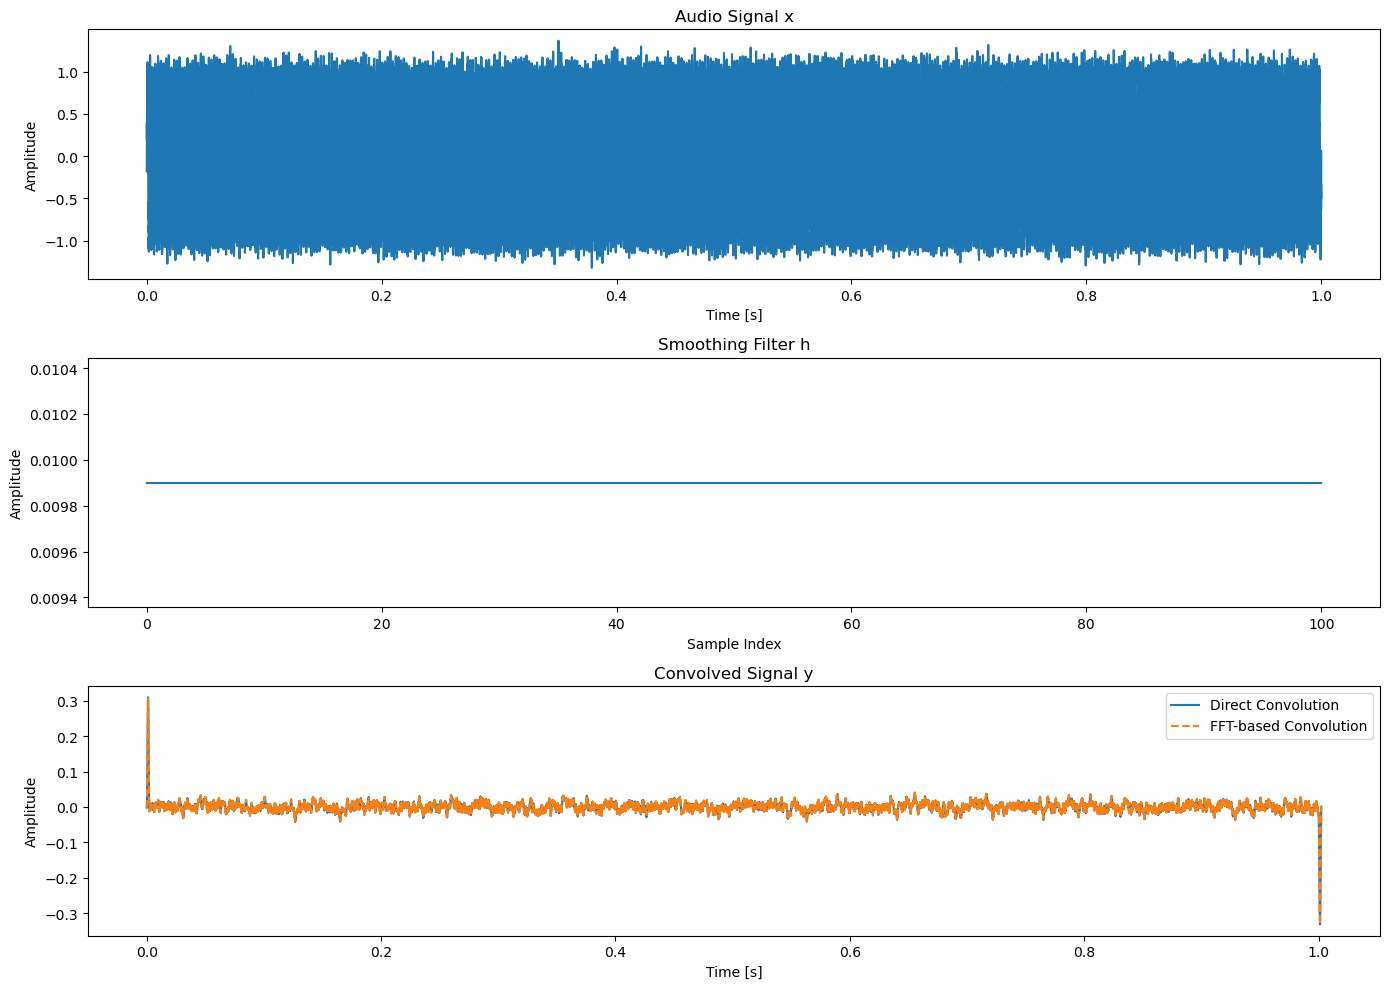

In [7]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Audio Signal x')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(np.arange(len(h)), h)
plt.title('Smoothing Filter h')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
t_conv = np.linspace(0, duration + (filter_size - 1) / fs, len(y_direct))
plt.plot(t_conv, y_direct.real, label='Direct Convolution')
plt.plot(t_conv, y_fft.real, '--', label='FFT-based Convolution')
plt.title('Convolved Signal y')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()




## Listen to the smoothed signals:

In [8]:
Audio(y_direct, rate=fs)

In [9]:
Audio(y_fft, rate=fs)

c:\Users\ahmmo\anaconda3\envs\cfe\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
